<a href="https://colab.research.google.com/github/aneeshsenthil/AIML_Training_Projects_and_Labs/blob/main/WEEK3_AIML_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

Module 1, Lab 1<br>



In [1]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=18645ad1a0656f6acd394db4407d639acfa9d5d0b8bfd9a85d0b4e27bdcd2d5b
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [2]:
topic1 = 'Asteroid'
topic2 = 'Mona Lisa'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

wikipedia.set_lang('es')
es1 = wikipedia.page(topic1).content
es2 = wikipedia.page(topic2).content

In [4]:
eng1

'An asteroid is a minor planet—an object larger than a meteoroid that is neither a planet nor an identified comet—that orbits within the inner Solar System or is co-orbital with Jupiter (Trojan asteroids). Asteroids are rocky, metallic, or icy bodies with no atmosphere, and are broadly classified into C-type (carbonaceous), M-type (metallic), or S-type (silicaceous). The size and shape of asteroids vary significantly, ranging from small rubble piles under a kilometer across to Ceres, a dwarf planet almost 1000 km in diameter. A body is classified as a comet, not an asteroid, if it shows a coma (tail) when warmed by solar radiation, although recent observations suggest a continuum between these types of bodies.\nOf the roughly one million known asteroids, the greatest number are located between the orbits of Mars and Jupiter, approximately 2 to 4 AU from the Sun, in a region known as the main asteroid belt. The total mass of all the asteroids combined is only 3% that of Earth\'s Moon. T

In [5]:
eng2

'The Mona Lisa is a half-length portrait painting by the Italian artist Leonardo da Vinci. Considered an archetypal masterpiece of the Italian Renaissance, it has been described as "the best known, the most visited, the most written about, the most sung about, [and] the most parodied work of art in the world." The painting\'s novel qualities include the subject\'s enigmatic expression, monumentality of the composition, the subtle modelling of forms, and the atmospheric illusionism.\nThe painting has been traditionally considered to depict the Italian noblewoman Lisa del Giocondo. It is painted in oil on a white poplar panel. Leonardo never gave the painting to the Giocondo family. It was believed to have been painted between 1503 and 1506; however, Leonardo may have continued working on it as late as 1517. King Francis I of France acquired the Mona Lisa after Leonardo\'s death in 1519, and it is now the property of the French Republic. It has normally been on display at the Louvre in P

In [6]:
fr1

"Asteroid City est un film américain réalisé par Wes Anderson et sorti en 2023. Il est présenté au festival de Cannes 2023.\n\n\n== Synopsis ==\nL'histoire se déroule à deux niveaux : d'une part, en noir et blanc et en format académique, le célèbre écrivain Conrad Earp rédige et monte une pièce intitulée Asteroid City et d'autre part, en couleurs et en format écran large, l'intrigue de la pièce elle-même. La pièce est construite en trois actes et les deux actions se succèdent en alternance.\nAsteroid City, ville fictive située dans le désert de l'Arizona, est célèbre pour son cratère, dû à l'écrasement d'une météorite, et pour sa proximité avec un centre d'essais nucléaires. La petite bourgade s'apprête à accueillir la convention Junior Stargazer. Celle-ci rassemble des élèves et parents de tout le pays pour une compétition érudite sur l'astronomie,. Le photographe de guerre Augie Steenbeck arrive dans la ville, avec son fils Woodrow, participant au concours, et ses trois petites fille

This is what the text looks like:

In [7]:
fr2

"La Joconde (en italien : La Gioconda [la dʒoˈkonda] ou Monna Lisa [ˈmɔnna ˈliːza]), ou Portrait de Monna Lisa, est un tableau de Léonard de Vinci, réalisé entre 1503 et 1506 ou entre 1513 et 1516,, et peut-être jusqu'à 1517 (l'artiste étant mort le 2 mai 1519), qui représente un portrait mi-corps, celui de la Florentine Lisa Gherardini, épouse de Francesco del Giocondo. Très probablement acquise par François Ier, cette peinture à l'huile sur panneau de bois de peuplier de 77 × 53 cm est exposée au musée du Louvre à Paris. La Joconde est l'un des rares tableaux attribués de façon certaine à Léonard de Vinci.\nLa Joconde est devenue un tableau éminemment célèbre car, depuis sa réalisation, nombre d'artistes l'ont pris comme référence. À l'époque romantique, les artistes ont été fascinés par ce tableau et ont contribué à développer le mythe qui l'entoure, en faisant de ce tableau l’une des œuvres d'art les plus célèbres du monde, si ce n'est la plus célèbre : elle est en tout cas considé

In [8]:
es1

'¡Asteroide! (título origina: Asteroid) es una miniserie estadounidense de 1997 de la NBC sobre un asteroide gigante en curso de colisión a la tierra y sobre las actividades del Gobierno de los Estados Unidos para evitar su colisión con la tierra, lo que sería una tremenda catástrofe. \nLa miniserie es protagonizada por Michael Biehn y Annabella Sciorra y fue dirigida por Bradford May.\n\n\n== Argumento ==\nLa Dra. Lily McKee, Directora del Observatorio Nacional de los Estados Unidos, descubre poco antes del 4 de julio que el cometa Fletcher, que gira alrededor de la Tierra cada 4000 años, ha sacado de su órbita a dos grandes asteroides, Helios y Eros, que debido a ello se están dirigiendo hacia la Tierra. Helios es de 400 m y Eros 4 km de largo. También descubre que, antes de ese acontecimiento, un pequeño asteroide también salió de su órbita y causó en Montana un incendio, que el Director de FEMA Jack Wallach está combatiendo.\nLily le informa de lo que está pasando. Después de conve

In [9]:
es2

'El retrato de Lisa Gherardini, esposa de Francesco del Giocondo,[1]\u200b más conocido como La Gioconda (La Joconde en francés) o Monna Lisa, es una obra pictórica del polímata renacentista florentino Leonardo da Vinci. Fue adquirida por el rey Francisco I de Francia a comienzos del siglo XVI y desde entonces es propiedad del Estado francés. Se halla expuesta en el Museo del Louvre de París, siendo, sin duda, la «joya» de sus colecciones.\nGioconda significa "esposa alegre o jovial" en italiano. Hay 12 santorales con ese nombre, unos masculinos, otros femeninos. Una tesis del nombre del óleo, La Gioconda, la más aceptada es sobre la identidad de la modelo: la esposa de Francesco Bartolomeo de Giocondo, que realmente se llamaba Lisa Gherardini, de donde viene su otro nombre: Monna (señora, en el italiano antiguo) Lisa. El Museo del Louvre acepta el título completo indicado al principio como el título original de la obra, aunque no reconoce la identidad de la modelo y tan solo la acepta

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [10]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [11]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)
es1 = cleanup(es1)
es2 = cleanup(es2)

In [12]:
print(eng1)

anasteroidisaminorplanetanobjectlargerthanameteoroidthatisneitheraplanetnoranidentifiedcometthatorbitswithintheinnersolarsystemoriscoorbitalwithjupitertrojanasteroidsasteroidsarerockymetallicoricybodieswithnoatmosphereandarebroadlyclassifiedintoctypecarbonaceousmtypemetallicorstypesilicaceousthesizeandshapeofasteroidsvarysignificantlyrangingfromsmallrubblepilesunderakilometeracrosstoceresadwarfplanetalmostkmindiameterabodyisclassifiedasacometnotanasteroidifitshowsacomatailwhenwarmedbysolarradiationalthoughrecentobservationssuggestacontinuumbetweenthesetypesofbodiesoftheroughlyonemillionknownasteroidsthegreatestnumberarelocatedbetweentheorbitsofmarsandjupiterapproximatelytoaufromthesuninaregionknownasthemainasteroidbeltthetotalmassofalltheasteroidscombinedisonlythatofearthsmoonthemajorityofmainbeltasteroidsfollowslightlyellipticalstableorbitsrevolvinginthesamedirectionastheearthandtakingfromthreetosixyearstocompleteafullcircuitofthesunasteroidshavehistoricallybeenobservedfromearththefir

In [13]:
print(eng2)

themonalisaisahalflengthportraitpaintingbytheitalianartistleonardodavinciconsideredanarchetypalmasterpieceoftheitalianrenaissanceithasbeendescribedasthebestknownthemostvisitedthemostwrittenaboutthemostsungaboutandthemostparodiedworkofartintheworldthepaintingsnovelqualitiesincludethesubjectsenigmaticexpressionmonumentalityofthecompositionthesubtlemodellingofformsandtheatmosphericillusionismthepaintinghasbeentraditionallyconsideredtodepicttheitaliannoblewomanlisadelgiocondoitispaintedinoilonawhitepoplarpanelleonardonevergavethepaintingtothegiocondofamilyitwasbelievedtohavebeenpaintedbetweenandhoweverleonardomayhavecontinuedworkingonitaslateaskingfrancisioffranceacquiredthemonalisaafterleonardosdeathinanditisnowthepropertyofthefrenchrepublicithasnormallybeenondisplayatthelouvreinparissincethepaintingsglobalfameandpopularitypartlystemfromitstheftbyvincenzoperuggiawhoattributedhisactionstoitalianpatriotismabeliefitshouldbelongtoitalythetheftandsubsequentrecoveryingeneratedunprecedentedpubli

In [14]:
print(fr1)

asteroidcityestunfilmamricainralisparwesandersonetsortienilestprsentaufestivaldecannessynopsislhistoiresedrouledeuxniveauxdunepartennoiretblancetenformatacadmiqueleclbrecrivainconradearprdigeetmonteunepiceintituleasteroidcityetdautrepartencouleursetenformatcranlargelintriguedelapiceellemmelapiceestconstruiteentroisactesetlesdeuxactionssesuccdentenalternanceasteroidcityvillefictivesituedansledsertdelarizonaestclbrepoursoncratredlcrasementdunemtoriteetpoursaproximitavecuncentredessaisnuclaireslapetitebourgadesapprteaccueillirlaconventionjuniorstargazercellecirassembledeslvesetparentsdetoutlepayspourunecomptitionruditesurlastronomielephotographedeguerreaugiesteenbeckarrivedanslavilleavecsonfilswoodrowparticipantauconcoursetsestroispetitesfillesleurmreestmortetroissemainesauparavantmaissteenbeckquivoyageavecuneboterempliedesescendresnapasencoreoslediresesenfantsleurvoituretombeenpanneleurarriveetservleirrparableaugiesteenbeckappelledonclaidesonbeauprestanleyaugieetwoodrowrencontrentmidgeca

In [15]:
print(fr2)

lajocondeenitalienlagiocondaladokondaoumonnalisamnnalizaouportraitdemonnalisaestuntableaudelonarddevinciralisentreetouentreetetpeuttrejusqulartistetantmortlemaiquireprsenteunportraitmicorpsceluidelaflorentinelisagherardinipousedefrancescodelgiocondotrsprobablementacquiseparfranoisiercettepeinturelhuilesurpanneaudeboisdepeuplierdecmestexposeaumusedulouvreparislajocondeestlundesrarestableauxattribusdefaoncertainelonarddevincilajocondeestdevenueuntableauminemmentclbrecardepuissaralisationnombredartisteslontpriscommerfrencelpoqueromantiquelesartistesonttfascinsparcetableauetontcontribudvelopperlemythequilentoureenfaisantdecetableaulunedesuvresdartlesplusclbresdumondesicenestlaplusclbreelleestentoutcasconsidrecommelunedesreprsentationsdunvisagefmininlesplusclbresaumondeauxxiesicleelleestdevenuelobjetdartleplusvisitaumondedevantlediamanthopeavecvisiteursquiviennentladmireretlaphotographierquotidiennementdescriptionlajocondeestleportraitdunejeunefemmesurfonddunpaysagemontagneuxauxhorizonsloin

In [16]:
print(es1)

asteroidettulooriginaasteroidesunaminiserieestadounidensededelanbcsobreunasteroidegiganteencursodecolisinalatierraysobrelasactividadesdelgobiernodelosestadosunidosparaevitarsucolisinconlatierraloqueseraunatremendacatstrofelaminiserieesprotagonizadapormichaelbiehnyannabellasciorrayfuedirigidaporbradfordmayargumentoladralilymckeedirectoradelobservatorionacionaldelosestadosunidosdescubrepocoantesdeldejulioqueelcometafletcherquegiraalrededordelatierracadaaoshasacadodesurbitaadosgrandesasteroidesheliosyerosquedebidoaelloseestndirigiendohacialatierraheliosesdemyeroskmdelargotambindescubrequeantesdeeseacontecimientounpequeoasteroidetambinsalidesurbitaycausenmontanaunincendioqueeldirectordefemajackwallachestcombatiendolilyleinformadeloqueestpasandodespusdeconvencerlocontactajuntoaellaalgobiernoparaquelatomenenserioellossiguensurecomendacindeevacuarkansascityantesdequehelioscolisioneallpocodespusdelaevacuacinhelioscolisionaconlatierradondealcaerenlaatmsferaserompeyaqueesdehielounapartesinembarg

In [17]:
print(es2)

elretratodelisagherardiniesposadefrancescodelgiocondomsconocidocomolagiocondalajocondeenfrancsomonnalisaesunaobrapictricadelpolmatarenacentistaflorentinoleonardodavincifueadquiridaporelreyfranciscoidefranciaacomienzosdelsigloxviydesdeentoncesespropiedaddelestadofrancssehallaexpuestaenelmuseodellouvredeparssiendosindudalajoyadesuscoleccionesgiocondasignificaesposaalegreojovialenitalianohaysantoralesconesenombreunosmasculinosotrosfemeninosunatesisdelnombredelleolagiocondalamsaceptadaessobrelaidentidaddelamodelolaesposadefrancescobartolomeodegiocondoquerealmentesellamabalisagherardinidedondevienesuotronombremonnaseoraenelitalianoantiguolisaelmuseodellouvreaceptaelttulocompletoindicadoalprincipiocomoelttulooriginaldelaobraaunquenoreconocelaidentidaddelamodeloytansololaaceptacomounahiptesisesunleosobretabladelamodecmpintadoentreyyretocadovariasvecesporelautorseconsideraelejemplomslogradodesfumatotcnicamuycaractersticadeleonardosibienactualmentesucoloridooriginalesmenosperceptibleporeloscure

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [18]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

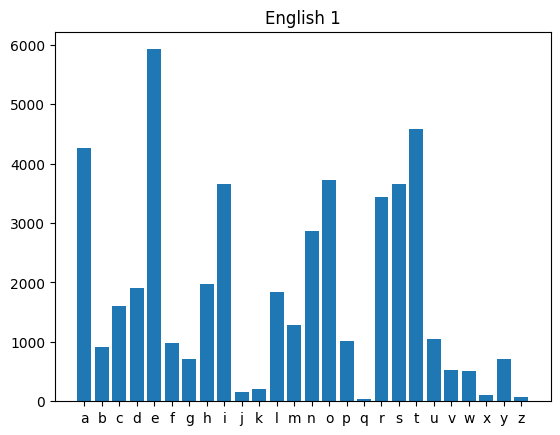

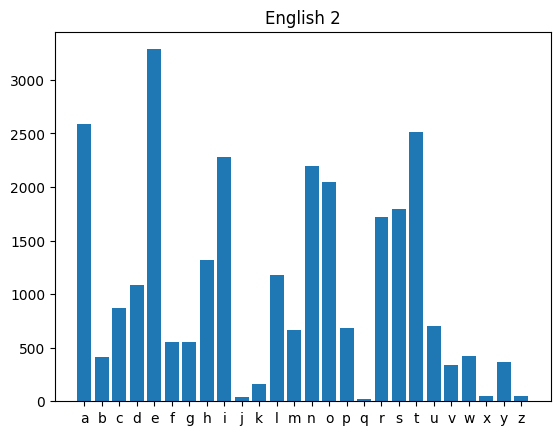

In [19]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

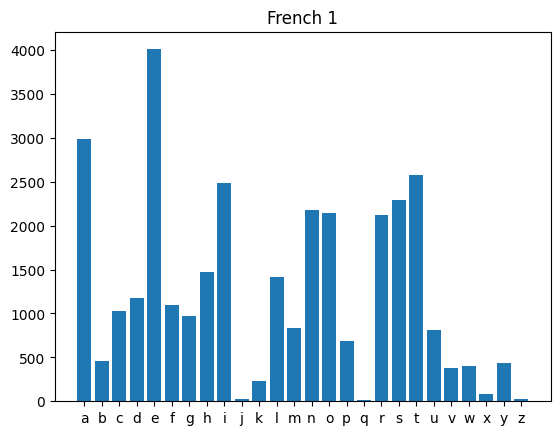

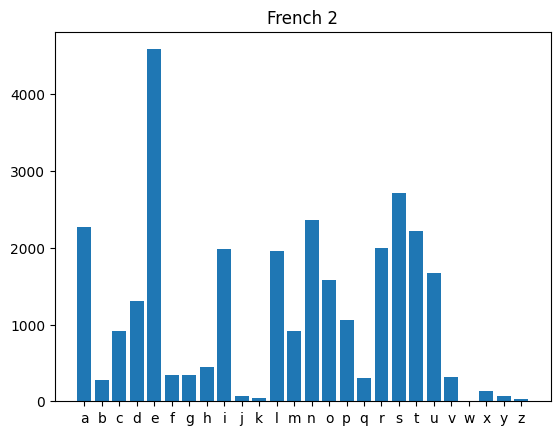

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

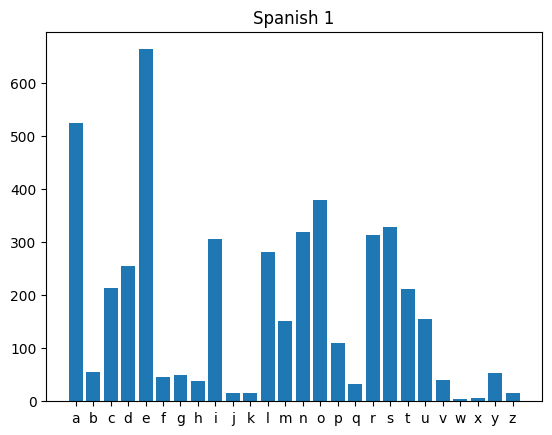

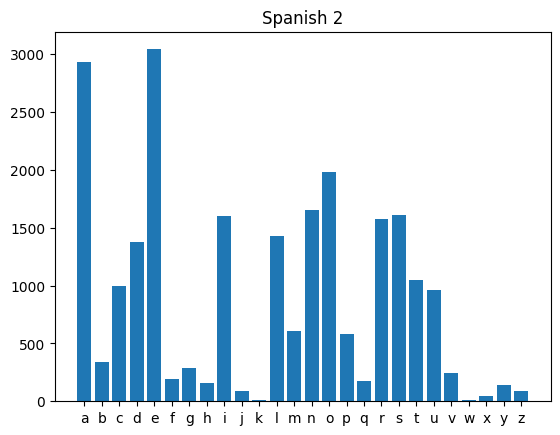

In [20]:
unigram_es1 = Counter(ngrams(es1,1))
plothistogram(unigram_es1)
plt.title('Spanish 1')
plt.show()
unigram_es2 = Counter(ngrams(es2,1))
plothistogram(unigram_es2)
plt.title('Spanish 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

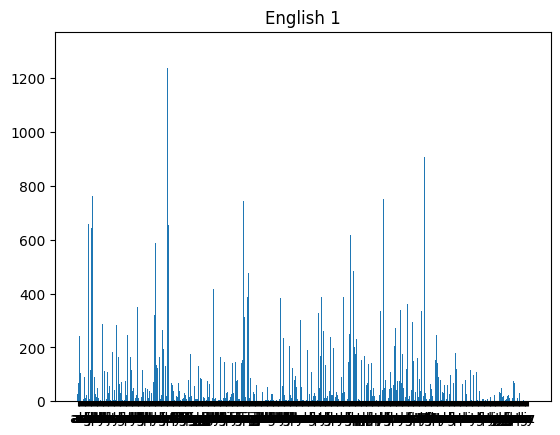

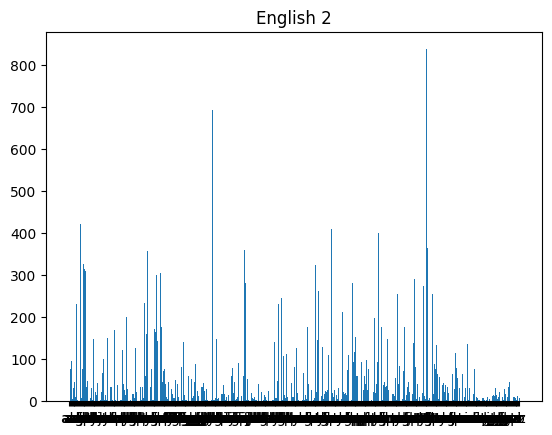

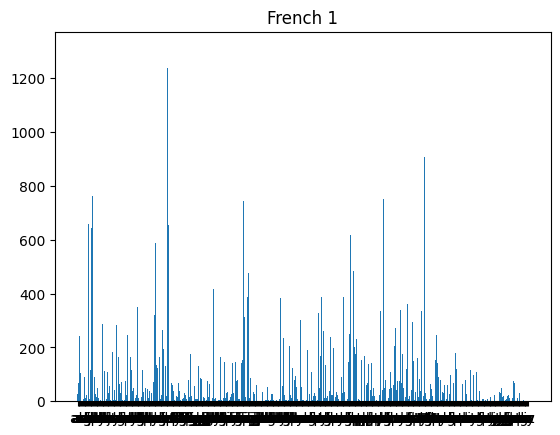

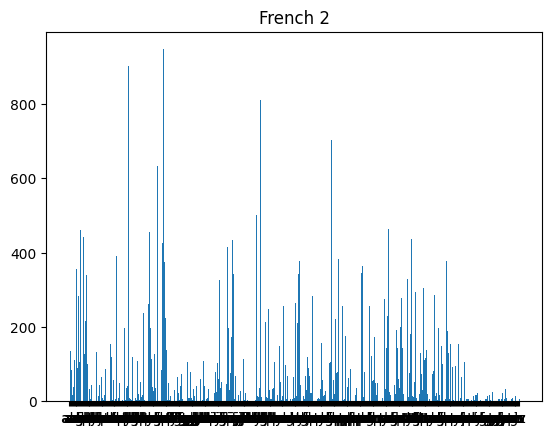

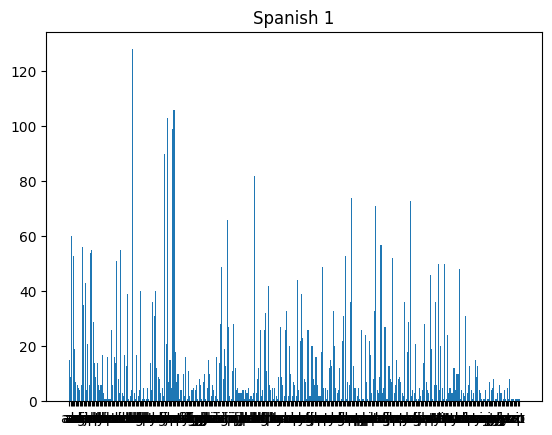

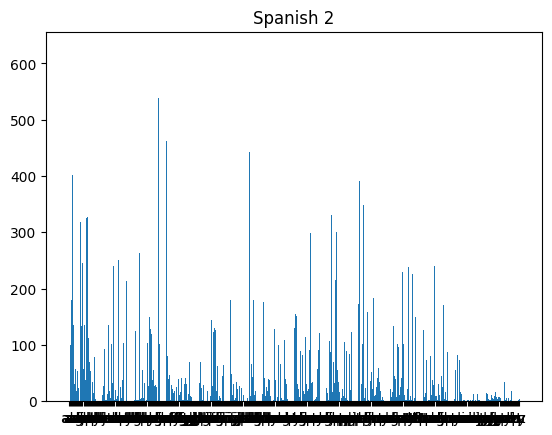

In [22]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

bigram_es1 = Counter(ngrams(es1,2))
plothistogram(bigram_es1)
plt.title('Spanish 1')
plt.show()

bigram_es2 = Counter(ngrams(es2,2))
plothistogram(bigram_es2)
plt.title('Spanish 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [31]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

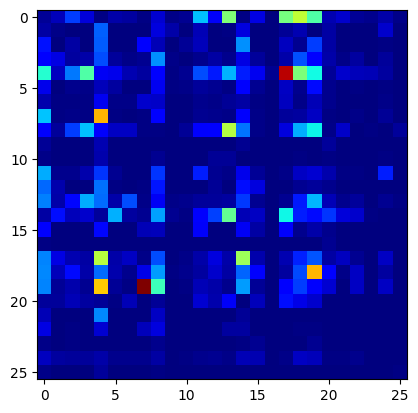

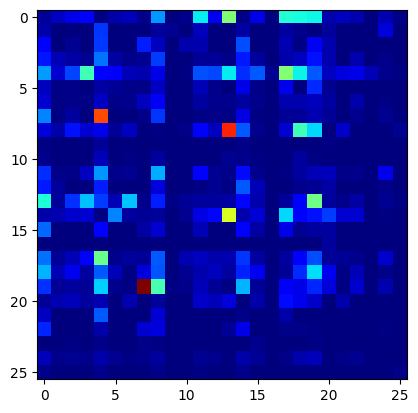

In [32]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

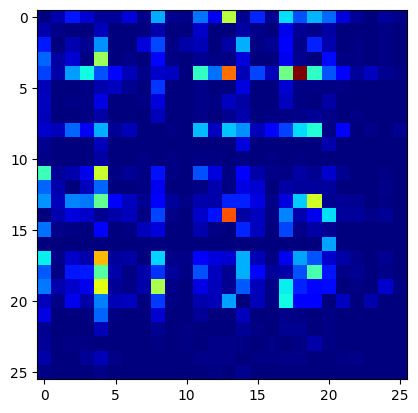

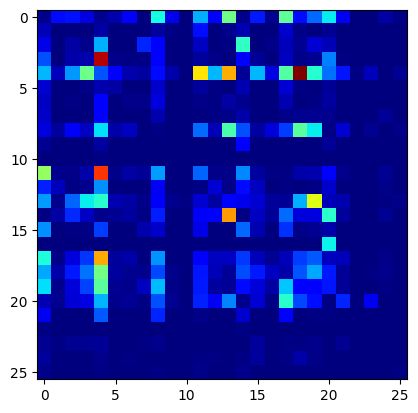

In [33]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

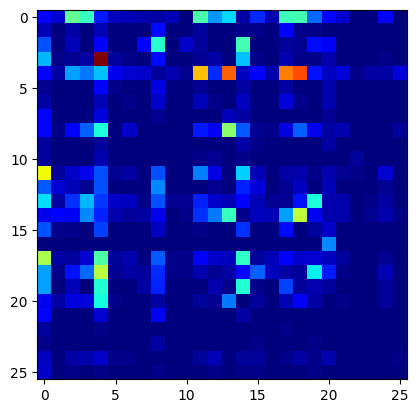

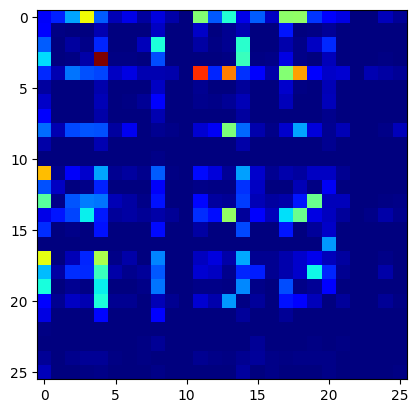

In [34]:
bies1 = plotbihistogram(bigram_es1)
plt.show()
bies2 = plotbihistogram(bigram_es2)

Let us look at the top 10 ngrams for each text.

In [35]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [36]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)
print('\nSpanish 1:')
ShowTopN(bies1)
print('\nSpanish 2:')
ShowTopN(bies2)


English 1:
('t', 'h') : 1307.0
('e', 'r') : 1239.0
('s', 't') : 937.0
('h', 'e') : 935.0
('t', 'e') : 907.0
('a', 's') : 763.0
('r', 'e') : 750.0
('i', 'n') : 744.0
('r', 'o') : 706.0
('a', 'n') : 659.0

English 2:
('t', 'h') : 838.0
('i', 'n') : 730.0
('h', 'e') : 694.0
('o', 'n') : 511.0
('e', 'r') : 427.0
('a', 'n') : 423.0
('n', 't') : 409.0
('r', 'e') : 401.0
('t', 'i') : 366.0
('i', 's') : 360.0

French 1:
('e', 's') : 191.0
('o', 'n') : 157.0
('e', 'n') : 151.0
('r', 'e') : 136.0
('t', 'e') : 120.0
('n', 't') : 115.0
('l', 'e') : 114.0
('a', 'n') : 109.0
('t', 'i') : 106.0
('d', 'e') : 103.0

French 2:
('e', 's') : 947.0
('d', 'e') : 901.0
('l', 'e') : 810.0
('o', 'n') : 703.0
('r', 'e') : 691.0
('e', 'n') : 685.0
('e', 'l') : 632.0
('n', 't') : 589.0
('l', 'a') : 500.0
('s', 'e') : 463.0

Spanish 1:
('d', 'e') : 128.0
('e', 's') : 106.0
('e', 'n') : 103.0
('e', 'r') : 99.0
('e', 'l') : 90.0
('l', 'a') : 82.0
('o', 's') : 74.0
('s', 'e') : 73.0
('r', 'a') : 71.0
('i', 'n') : 66

We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [37]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Extract a subset of the data for our experiment:

In [38]:
no3 = train_X[train_y==3,:,:]
no4 = train_X[train_y==4,:,:]
no5 = train_X[train_y==5,:,:]

Let us visualize a few images here:

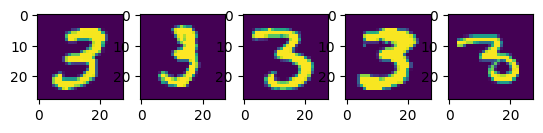

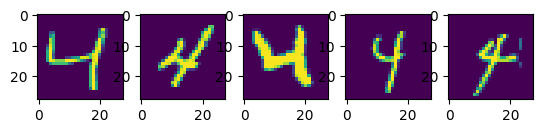

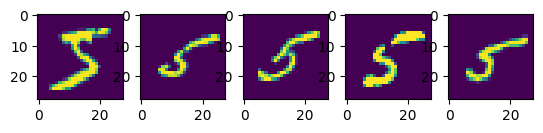

In [39]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no3[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no4[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no5[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [40]:
sum3 = np.sum(no3>0, (1,2)) # threshold before adding up
sum4 = np.sum(no4>0, (1,2))
sum5 = np.sum(no5>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

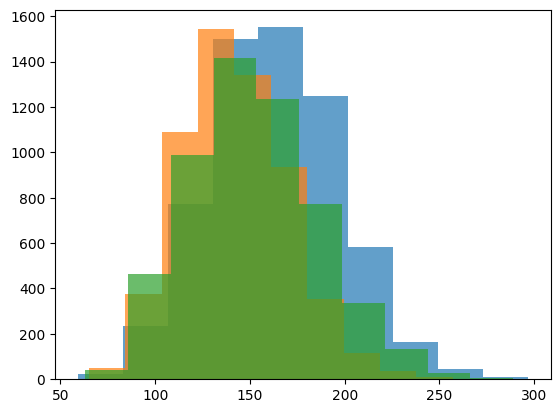

In [41]:
plt.hist(sum3, alpha=0.7);
plt.hist(sum4, alpha=0.7);
plt.hist(sum5, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [44]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

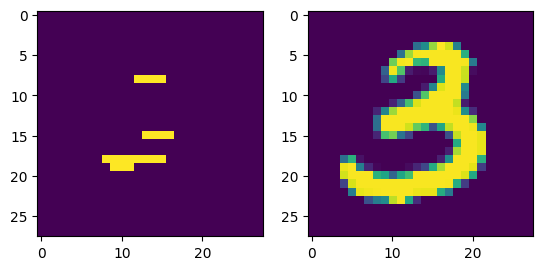

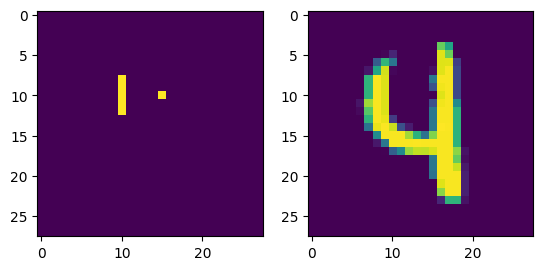

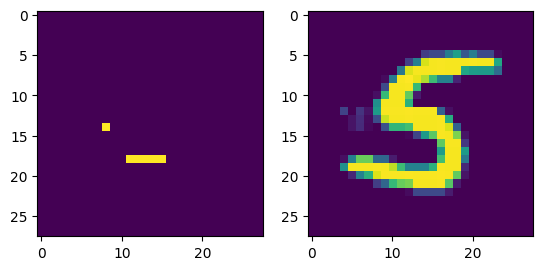

In [46]:
imgs = [no3[456,:,:],  no4[456,:,:],no5[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

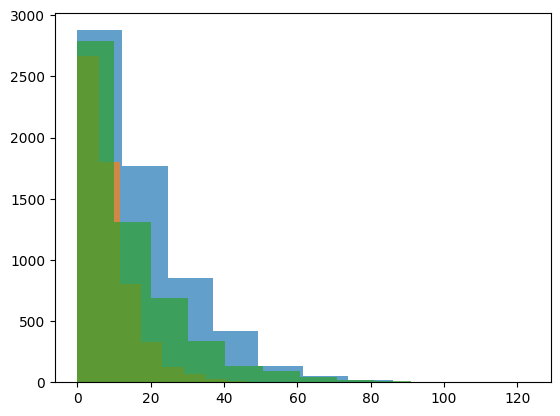

In [47]:
hole3 = np.array([getHolePixels(i).sum() for i in no3])
hole4 = np.array([getHolePixels(i).sum() for i in no4])
hole5 = np.array([getHolePixels(i).sum() for i in no5])

plt.hist(hole3, alpha=0.7);
plt.hist(hole4, alpha=0.7);
plt.hist(hole5, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [48]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

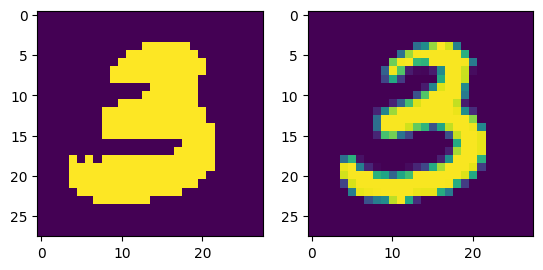

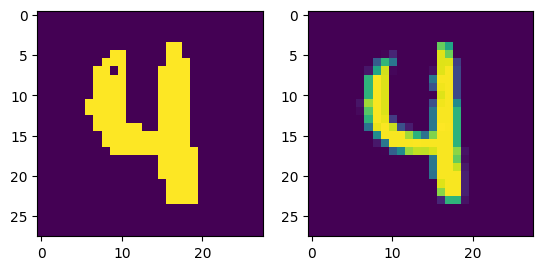

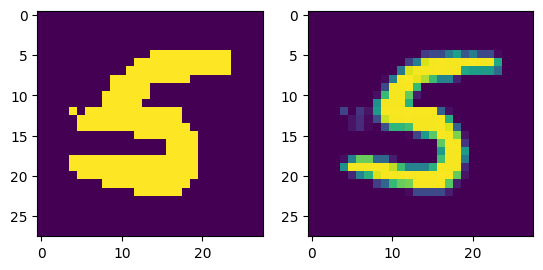

In [49]:
imgs = [no3[456,:,:],  no4[456,:,:],  no5[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

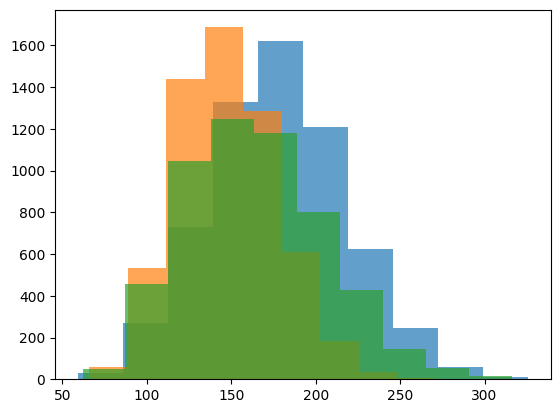

In [50]:
hull3 = np.array([getHullPixels(i).sum() for i in no3])
hull4 = np.array([getHullPixels(i).sum() for i in no4])
hull5 = np.array([getHullPixels(i).sum() for i in no5])

plt.hist(hull3, alpha=0.7);
plt.hist(hull4, alpha=0.7);
plt.hist(hull5, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [51]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

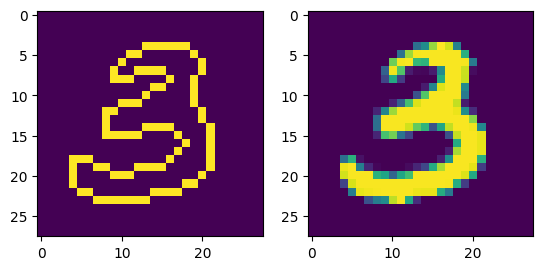

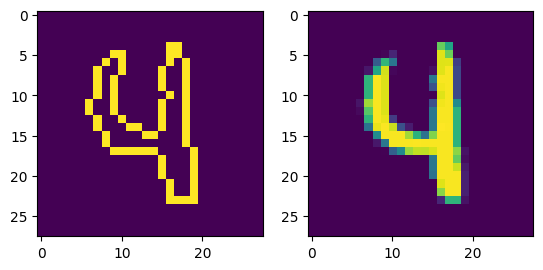

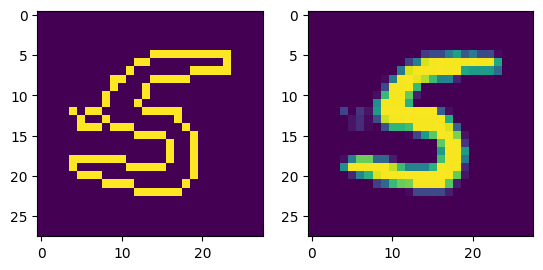

In [52]:
imgs = [no3[456,:,:],  no4[456,:,:],  no5[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

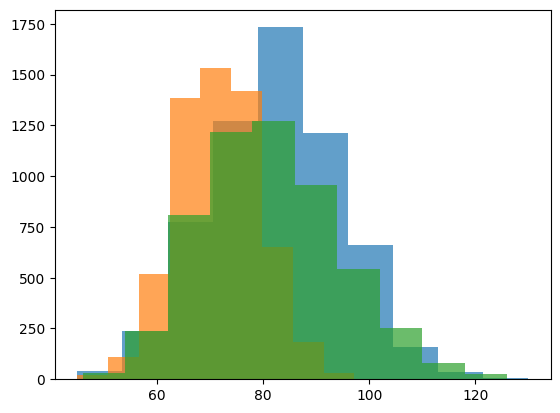

In [53]:
bound3 = np.array([getBoundaryPixels(i).sum() for i in no3])
bound4= np.array([getBoundaryPixels(i).sum() for i in no4])
bound5= np.array([getBoundaryPixels(i).sum() for i in no5])

plt.hist(bound3, alpha=0.7);
plt.hist(bound4, alpha=0.7);
plt.hist(bound5, alpha=0.7);

What will happen if we plot two features together?

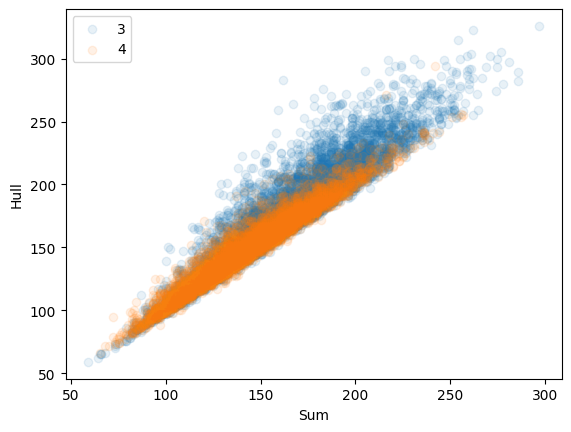

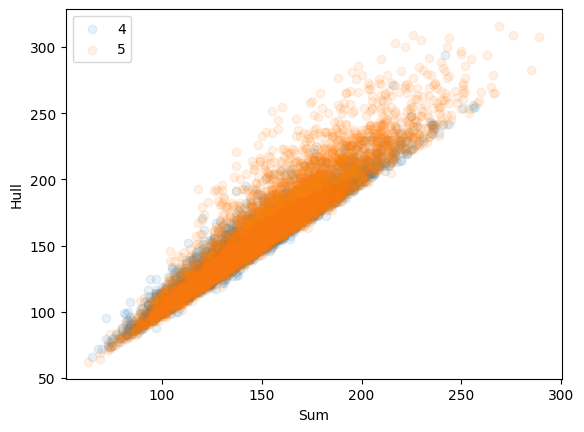

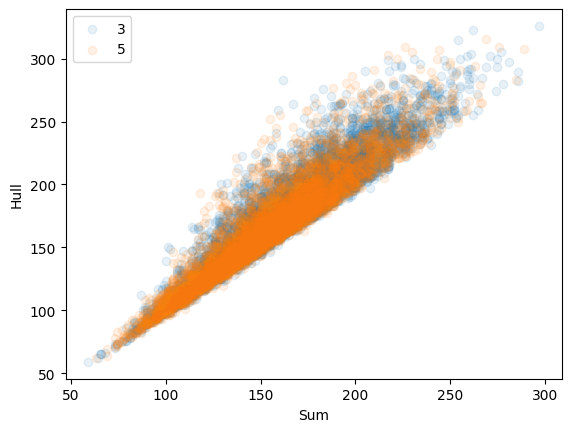

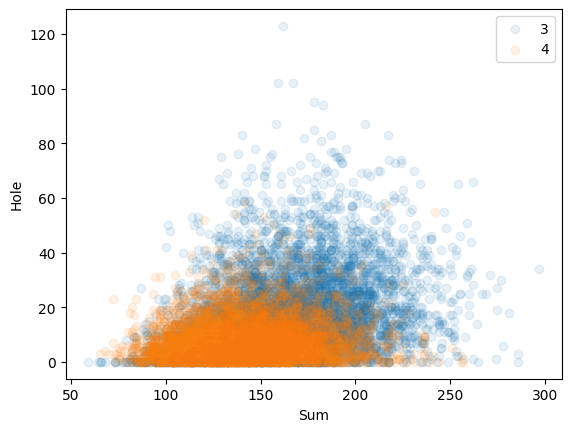

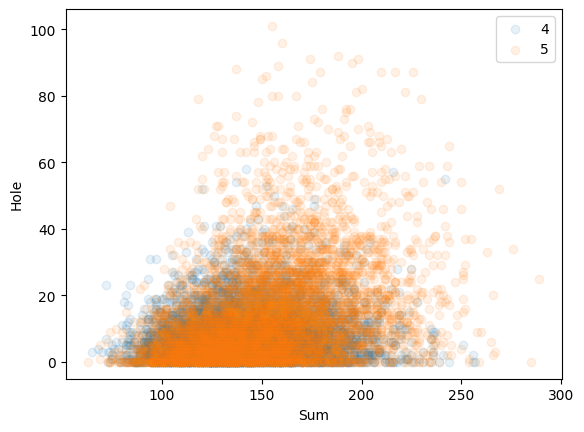

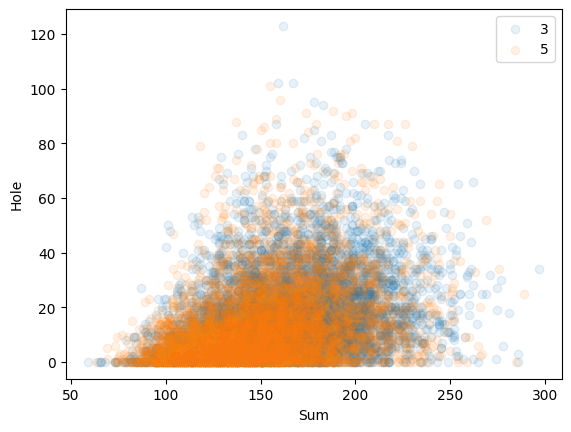

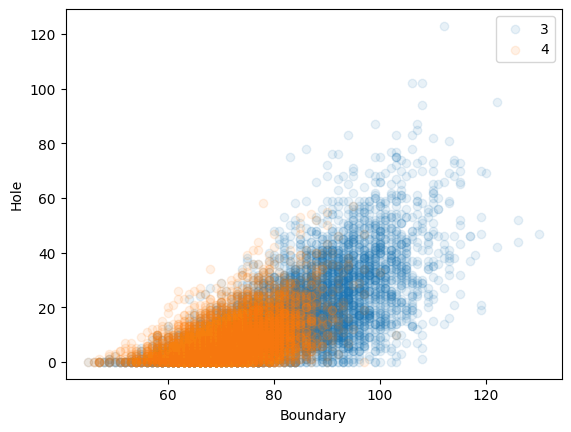

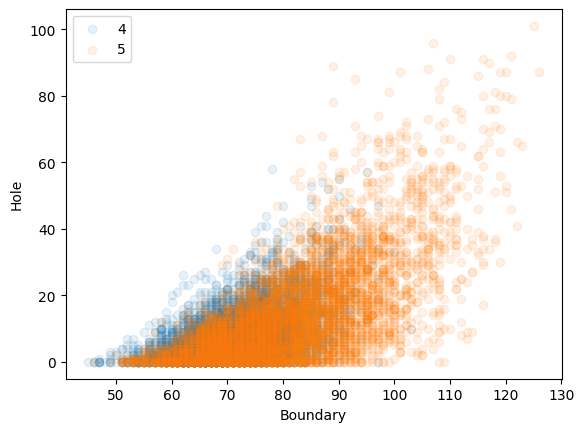

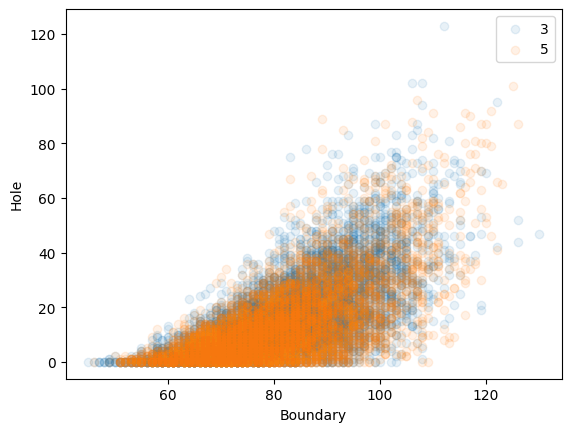

In [54]:
# Sum and hull
plt.scatter(sum3, hull3, alpha=0.1)
plt.scatter(sum4, hull4, alpha=0.1)

plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['3','4'])
plt.show()

plt.scatter(sum4, hull4, alpha=0.1)
plt.scatter(sum5, hull5, alpha=0.1)

plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['4','5'])
plt.show()

plt.scatter(sum3, hull3, alpha=0.1)
plt.scatter(sum5, hull5, alpha=0.1)

plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['3','5'])
plt.show()



# Sum and hole
plt.scatter(sum3, hole3, alpha=0.1)
plt.scatter(sum4, hole4, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['3','4'])
plt.show()

plt.scatter(sum4, hole4, alpha=0.1)
plt.scatter(sum5, hole5, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['4','5'])
plt.show()

plt.scatter(sum3, hole3, alpha=0.1)
plt.scatter(sum5, hole5, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['3','5'])
plt.show()



# Hole and boundary
plt.scatter(bound3, hole3, alpha=0.1)
plt.scatter(bound4, hole4, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['3','4'])
plt.show()


# Hole and boundary
plt.scatter(bound4, hole4, alpha=0.1)
plt.scatter(bound5, hole5, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['4','5'])
plt.show()


# Hole and boundary
plt.scatter(bound3, hole3, alpha=0.1)
plt.scatter(bound5, hole5, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['3','5'])
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?